In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Dataset

In [2]:
mean_01 = [0, 1]
cov_01  = [[2.3, 0.7], [0.7, 1.5]]

mean_02 = [4,3]
cov_02  = [[1.2, -0.5], [-0.5, 1]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

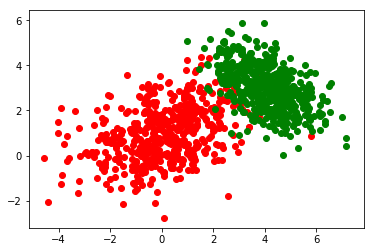

In [4]:
plt.figure()
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.show()

In [5]:
dataset = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
dataset.shape

(1000, 2)

In [6]:
dataset[:dist_01.shape[0], :] = dist_01
dataset[dist_01.shape[0]:, :] = dist_02

### Object Oriented Programming in Python

In [23]:
class Person:
    
    def __init__(self, name, age=10):
        # Constructor
        
        self.name = name
        self.age = age
    
    def __del__(self):
        print("Deleted")
    
    def __str__(self):
        return '{}'.format(self.name)
    
    def __repr__(self):
        return '{} {}'.format(self.name, self.age)

In [24]:
p1 = Person("Pratulya")
p2 = Person("Rishab")
print(p1)

Pratulya


In [25]:
p2

Rishab 10

In [26]:
del p1

Deleted


### KMeans Clustering

In [45]:
class Cluster:
#     count = 0
    
    def __init__(self, center, color):
        self.center = center
        self.color = color
        self.points = list()
#         self.id = count
#         Cluster.count += 1

    def __str__(self):
        return "Cluster <{}>".format(self.color)
    
    def __repr__(self):
        return "Cluster <{}>".format(self.color)
    
    def update_center(self):
        new_center = np.array(self.points).mean(axis=0)
        self.center = new_center
        

In [96]:
class KMeansClustering:
    
    def __init__(self, k, clusters, dataset, centers):
        self.k = k
        self.clusters = clusters
        self.dataset = dataset
        self.centers = centers
        self.inertias = list()
        
    def run(self, iterations=1):
        for _ in range(iterations):
#             self.calculate_distances()
#             self.assign_cluster()
            self.assign_closest_cluster()
            self.update_cluster_centers()
            self.inertias.append(self.calculate_inertia())


    def assign_closest_cluster(self):
        for cluster in self.clusters:
            cluster.points = list()
            
        for point in self.dataset:
            
            distances = [] 
            
            for cluster in self.clusters:
                d = KMeansClustering.euclidean(point, cluster.center)
                distances.append((d, cluster))
        
            distances = sorted(distances, key=lambda x: x[0])
            closest_cluster = distances[0][1]
            closest_cluster.points.append(point)
            
    def update_cluster_centers(self):
        for cluster in self.clusters:
#             new_center = np.array(cluster.points).mean(axis=0)
#             cluster.center = new_center
            cluster.update_center()
    
            
    def calculate_inertia(self):
        inertia = 0
        
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeansClustering.euclidean(point, cluster.center)
        return inertia
    
            
    @staticmethod
    def euclidean(p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))
            
        
        

In [122]:
k = 5
random_centers = np.random.uniform(low=dataset.min(), high=dataset.max(), size=(k, dataset.shape[1]))
colors = ['red', 'green', 'blue', 'yellow', 'pink']

In [123]:
clusters = []
# for i in range(k):
#     clusters.append(Cluster(random_centers[i], colors[i]))
for center, color in zip(random_centers, colors):
    clusters.append(Cluster(center, color))
clusters

[Cluster <red>,
 Cluster <green>,
 Cluster <blue>,
 Cluster <yellow>,
 Cluster <pink>]

In [124]:
kmeans = KMeansClustering(k, clusters, dataset, random_centers)

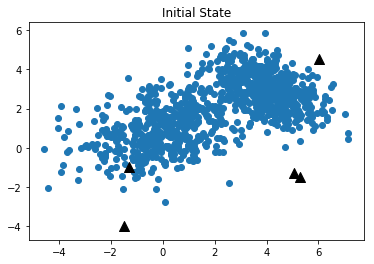

In [125]:
plt.figure()
plt.title("Initial State")
plt.scatter(kmeans.dataset[:, 0], kmeans.dataset[:, 1])
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], color='black', marker='^', s=100)
plt.show()

In [126]:
def plot_iteratively(kmeans, iterations=1, inp=True):
    for i in range(iterations):
        kmeans.run()
        plt.figure()
        plt.title("Iteration {}".format(i))
        for cluster in kmeans.clusters:
            points = np.array(cluster.points)
            plt.scatter(points[:, 0], points[:, 1], color=cluster.color)
            plt.scatter(cluster.center[0], cluster.center[1], color='black', marker='^', s=100)
        plt.show()
        if inp:
            input()
    

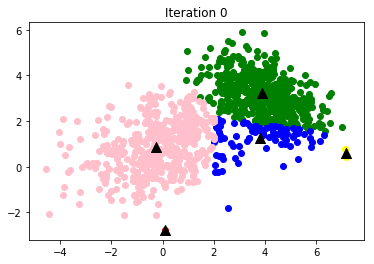

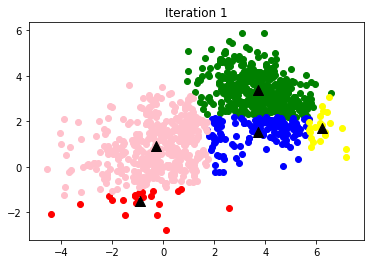

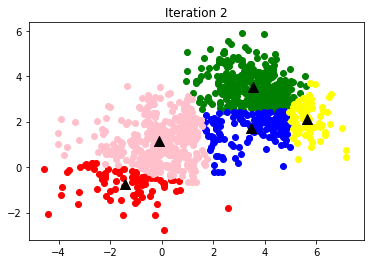

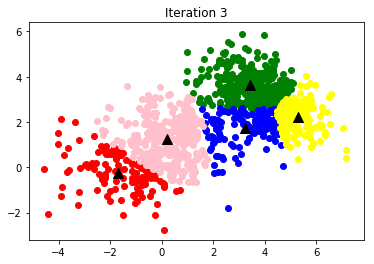

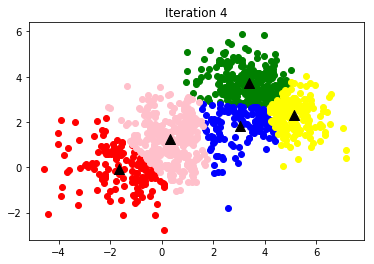

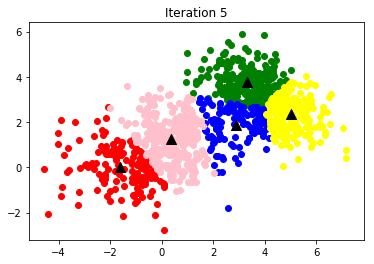

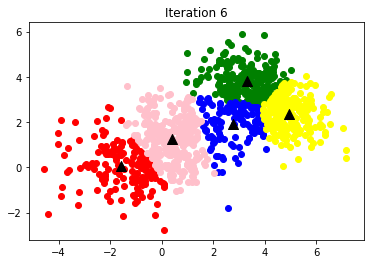

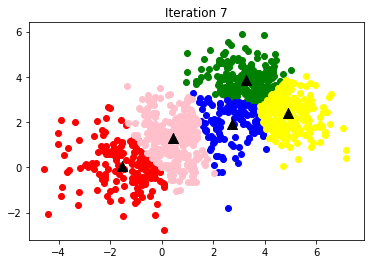

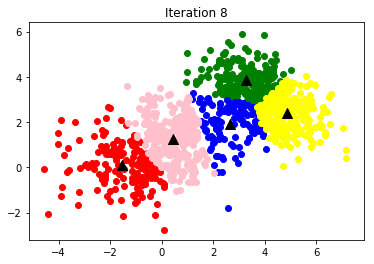

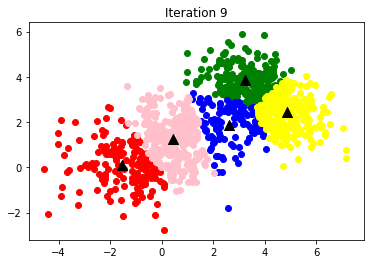

In [127]:
inertias = []
plot_iteratively(kmeans, 10)

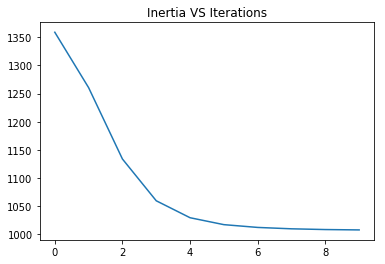

In [128]:
plt.figure()
plt.title("Inertia VS Iterations")
plt.plot(kmeans.inertias)
plt.show()